<a href="https://colab.research.google.com/github/Mahsa-Goudarzi/ComputerVision/blob/main/Test/CV_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Computer Vision - Tirana May 2025
# Final Evaluation Exercise: Complete the following exercises

## 1. Load and visualize the 'coins' image from the skimage built-in datasets. Report the size of the image and range of the pixel grayscale levels.

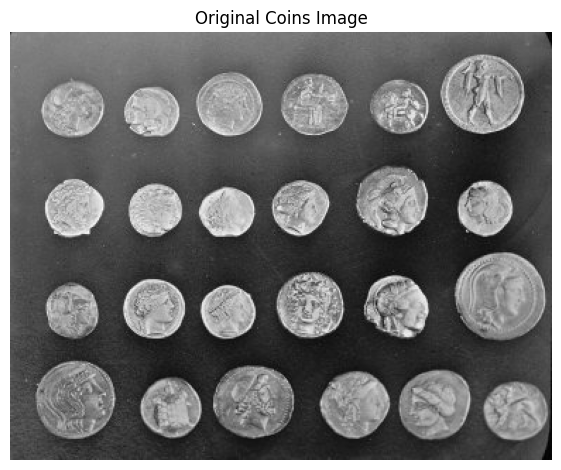

M = 303 columns, N = 384 rows
Pixel grayscale range: [1, 252]


In [5]:
import matplotlib.pyplot as plt
from skimage.data import coins

# Load image
image = coins()
# 'coins' is already grayscale, so we dont need to convert it to grayscale

# Plot original and thresholded images
plt.imshow(image, cmap='gray')
plt.title('Original Coins Image')
plt.axis('off')

plt.tight_layout()
plt.show()

print('M = {} columns, N = {} rows'.format(*image.shape)) # Print out image size

# Report pixel value range
pixel_min = image.min()
pixel_max = image.max()
print("Pixel grayscale range: [{}, {}]".format(pixel_min, pixel_max))

## 2. Represent the histogram of the image. Explain the peaks of the histogram in terms of regions of the image.

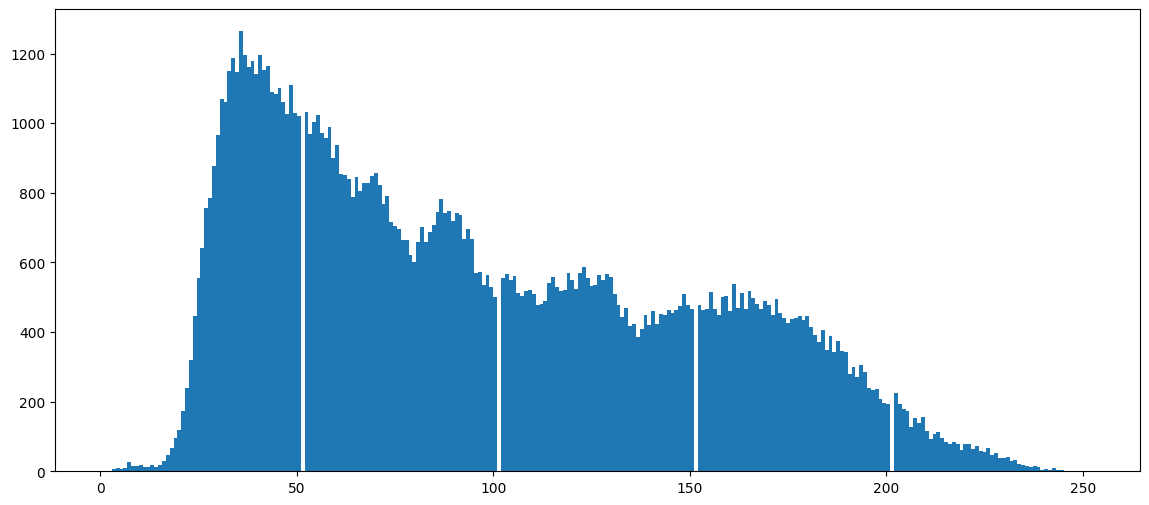

In [7]:
import numpy as np

# reshape the uint8 image as 1d array:
v = image.reshape(image.shape[0]*image.shape[1],1)

fig = plt.figure(figsize=(14, 6))
plt.hist(v, bins=256,density=False)
plt.show()

# The histogram shows two clear peaks, corresponding to the dark background and the bright coin surfaces.

## 3. Applied noise to the image and use the correct function to erase the noise.

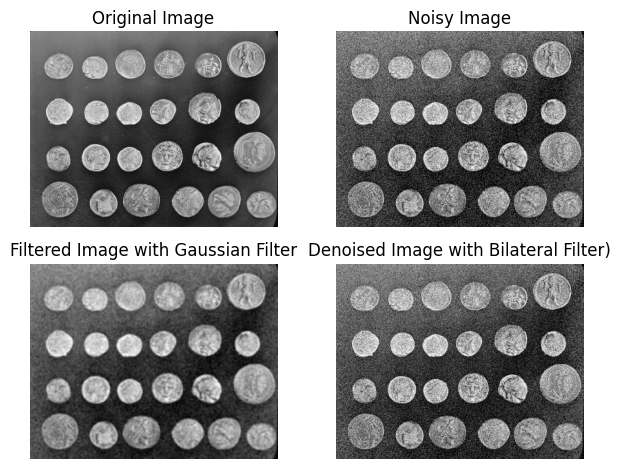

In [14]:
from skimage.util import random_noise
from skimage.filters import gaussian
from skimage.restoration import denoise_bilateral

noisy_image = random_noise(image, mode='gaussian', var=0.01)
filtered_image = gaussian(noisy_image, sigma=1)

# We'll use a bilateral filter to preserve edges while removing noise
denoised_image = denoise_bilateral(noisy_image, sigma_color=0.05, sigma_spatial=15, channel_axis=None)

fig, axes = plt.subplots(2,2)
axes[0,0].imshow(image, cmap='gray')
axes[0,0].set_title('Original Image')
axes[0,0].axis('off')

axes[0,1].imshow(noisy_image, cmap='gray')
axes[0,1].set_title('Noisy Image')
axes[0,1].axis('off')

axes[1,0].imshow(filtered_image, cmap='gray')
axes[1,0].set_title("Filtered Image with Gaussian Filter")
axes[1,0].axis('off')

axes[1,1].imshow(denoised_image, cmap='gray')
axes[1,1].set_title("Denoised Image with Bilateral Filter)")
axes[1,1].axis('off')

plt.tight_layout()
plt.show()

# Bilateral Filter works better than Gaussian Filter at preserving edges, like the sharp borders of the coins

## 4. Segment the image using a k-means clustering algorithm with k=2 and represent the result

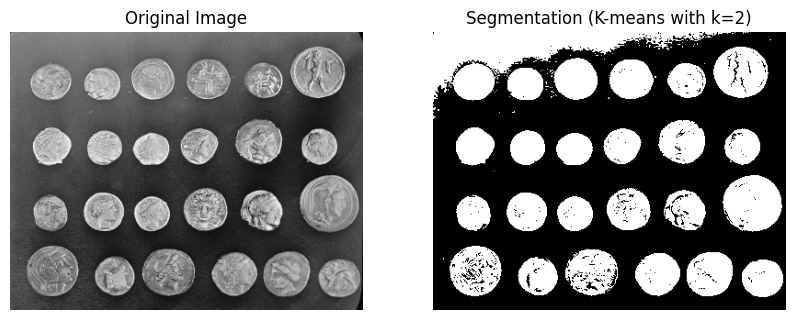

In [16]:
import matplotlib.gridspec as gridspec
from sklearn.cluster import KMeans

# Fit a Kmeans clustering model with two clusters using training image:
v_I = np.reshape(image,(image.shape[0]*image.shape[1],1)) # reshape image as NPIX x NCHANNELS array
n_clus = 2
kmeans = KMeans(n_clusters=n_clus, random_state=0).fit(v_I)

v_kmeans = kmeans.predict(v_I)
I_kmeans = np.reshape(v_kmeans,(image.shape[0],image.shape[1])) # reshape back to original image size

fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(1, 2)

ax1 = fig.add_subplot(gs[0,0])
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Original Image')
ax1.set_axis_off()

ax2 = fig.add_subplot(gs[0,1])
ax2.imshow(I_kmeans, cmap=plt.cm.gray)
ax2.set_title('Segmentation (K-means with k={})'.format(n_clus))
ax2.set_axis_off()

plt.show()

## 5. Label the objects found in the image. Generate a figure with the original image and the labeled image. How many coins are there in the image?

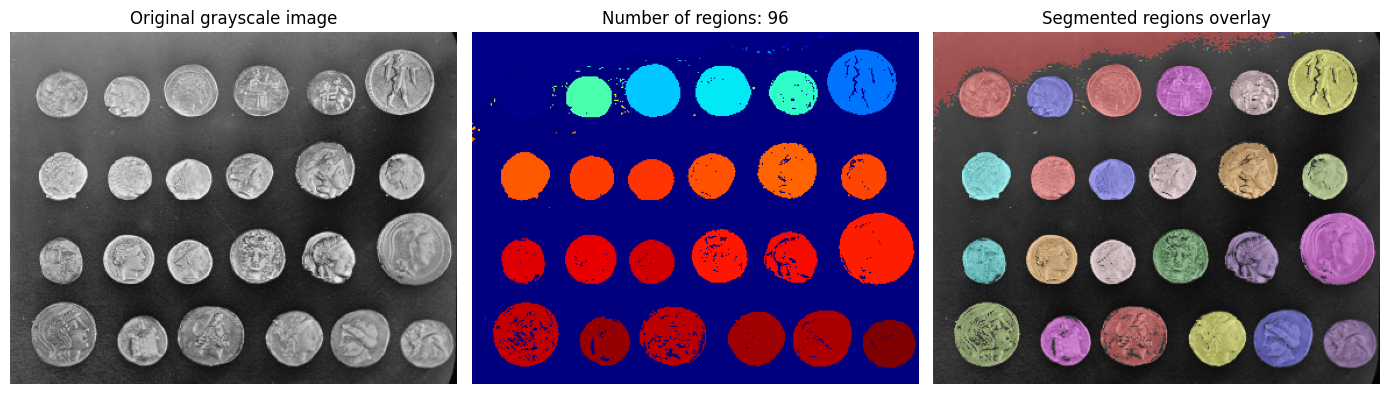

In [17]:
from skimage.measure import label
from skimage.color import label2rgb

# label image regions:
label_image, nregions = label(I_kmeans,return_num=True)
image_label_overlay = label2rgb(label_image, image=image)

fig, axes = plt.subplots(1,3,figsize=(14, 9))
ax = axes.ravel()
ax[0].imshow(image,cmap=plt.cm.gray)
ax[0].set_title('Original grayscale image')
ax[1].imshow(label_image,cmap=plt.cm.jet)
ax[1].set_title('Number of regions: {}'.format(nregions)) # set figure title
ax[2].imshow(image_label_overlay,cmap=plt.cm.jet)
ax[2].set_title('Segmented regions overlay')

ax[0].set_axis_off()
ax[1].set_axis_off()
ax[2].set_axis_off()
plt.tight_layout()
plt.show()

## 6. Extract the area, major axis length and orientation of each coin. Report the average values of the extracted features. Represent a scatterplot of the area vs major axis length.  

In [18]:
from skimage.measure import regionprops
import pandas as pd
from skimage import measure

properties = measure.regionprops_table(label_image,properties=['label','area','axis_major_length','orientation'])

df_features = pd.DataFrame(properties)
df_features.head()

,label,area,axis_major_length,orientation
0,1,8792.0,292.106573,-1.423583
1,2,37.0,14.020584,1.524098
2,3,21.0,16.645960,-1.508404
3,4,1.0,0.000000,-0.785398
4,5,2.0,2.000000,0.000000


In [21]:
print("Average value of area is: ", df_features['area'].mean())
print("Average value of axis_major_length is: ", df_features['axis_major_length'].mean())
print("Average value of orientation is: ", df_features['orientation'].mean())

Average value of area is:  469.96875
Average value of axis_major_length is:  15.758363582402723
Average value of orientation is:  -0.1608039190057604


<Axes: xlabel='axis_major_length', ylabel='area'>

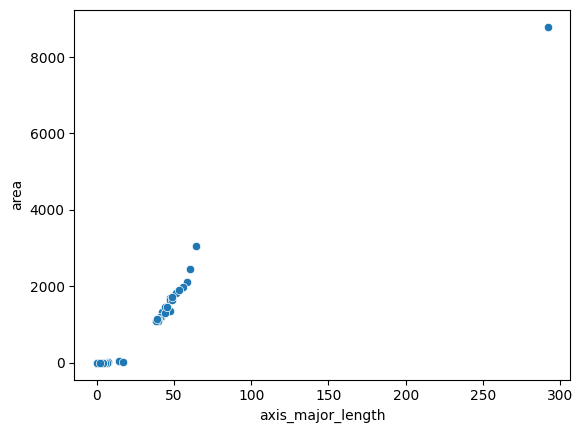

In [19]:
import seaborn as sns

sns.scatterplot(x='axis_major_length',y='area',data=df_features)

## 7. Using the labeled regions from the 'coins' image, how can I filter the regions to find those with an area greater than 1750 pixels, count how many such coins there are?

##8. Generate a 3-panel figure with the original image, the image with the little coins < 1750 coins (red color) and an image with the big coins > 1750 (blue color).

## 9. Describe the main steps required to perform  segmentation of an RGB image using an unsupervised clustering algorithm (use other algorithms different than K-Means and compare the results)

## 10. Extract the main texture features of this image

## Personal discussion

Provide a thoughtful reflection on the Computer Vision course, including your perspective on the knowledge you have acquired and your opinion about the professor. (Thank you very much for your feedback!)